In [ ]:
import os
import json
import csv
import pandas as pd
import pickle
import hashlib
import numpy as np

# Define folder paths
FOLDER_PATH = "YOUR_PREPARED_DATA_DIR"
# Select last inserted fingerprint for each device
SELECTED_FINGERPRINTS = "YOUR_SELECTED_FINGERPRINTS_FILE"
# Selected fingerprints for computing stability (devices having at least 2 fingerprints)
STABILILITY_FINGERPRINTS = "YOUR_SELECTED_FINGERPRINTS_FOR_STABILITY_FILE"


# Data storage for attribute statistics
fingerprints_combinations_stats = {}
def update_fingerprints_stats(fingerprints_stats, value):
    """Updates attribute statistics for a given key-value pair."""
    fingerprints_stats["coverage"] += 1
    if value not in fingerprints_stats["values"]:
        fingerprints_stats["values"][value] = 0
    fingerprints_stats["values"][value] += 1

def hash_dict(d):
    return hashlib.sha256(pickle.dumps(d)).hexdigest()

def load_json_file(file_path):
    """Helper function to load JSON data from a file."""
    with open(file_path, 'r') as file:
        return json.load(file)
    

latest_files = load_json_file(SELECTED_FINGERPRINTS)
print(len(latest_files))


833


In [8]:
all_fingerprints = []
SELECTED_ATTRIBUTES_DF = pd.read_csv('top_cleaned_stable_attribute_entropies.csv')
SELECTED_ATTRIBUTES_DF.sort_values(by="Unique Values", ascending=False, inplace=True)

for filename in os.listdir(FOLDER_PATH):
    if filename in latest_files:
        with open(os.path.join(FOLDER_PATH, filename), 'r') as f:
            data = json.load(f)
            row = {
                attr: hash_dict(data[attr]) if attr in data else np.nan
                for attr in SELECTED_ATTRIBUTES_DF["Attribute"].values
            }
            row["device_id"] = data.get("content://settings/secure.android_id", "")
            all_fingerprints.append(row)

fingerprints_df = pd.DataFrame(all_fingerprints)
print(fingerprints_df.shape)


(833, 96)


In [9]:
NB_ATTRIBUTES = 50
attribute_pool = SELECTED_ATTRIBUTES_DF["Attribute"].values[:NB_ATTRIBUTES]
selected_combo = []  # Will be filled incrementally
fingerprints_combinations_stats = {}

for k in range(1, NB_ATTRIBUTES + 1):
    best_attr = None
    best_counts = None
    max_unique = 0

    if k == 1:
        candidates = attribute_pool
    else:
        # Only consider attributes not already selected
        candidates = [attr for attr in attribute_pool if attr not in selected_combo]

    for attr in candidates:
        current_combo = selected_combo + [attr]
        df_k = fingerprints_df[current_combo].astype(str)
        combined = df_k.apply(lambda row: hash_dict(tuple(row)), axis=1)
        counts = combined.value_counts().to_dict()
        unique_count = sum(1 for v in counts.values() if v == 1)

        if unique_count > max_unique:
            max_unique = unique_count
            best_attr = attr
            best_counts = counts

    # Update selected combo and save stats
    selected_combo.append(best_attr)
    fingerprints_combinations_stats[str(k)] = {
        "coverage": len(combined),
        "values": best_counts,
        "attributes": selected_combo.copy()
    }

    print(f"Top {k} attributes having {max_unique} unique values:", selected_combo)

Top 1 attributes having 829 unique values: ['system_uptime']
Top 2 attributes having 833 unique values: ['system_uptime', 'android.provider.MediaStore.getVersion']
Top 3 attributes having 833 unique values: ['system_uptime', 'android.provider.MediaStore.getVersion', 'android.webkit.WebView.getCurrentWebViewPackage.fields.lastUpdateTime']
Top 4 attributes having 833 unique values: ['system_uptime', 'android.provider.MediaStore.getVersion', 'android.webkit.WebView.getCurrentWebViewPackage.fields.lastUpdateTime', 'android.webkit.WebSettings.getDefaultUserAgent']
Top 5 attributes having 833 unique values: ['system_uptime', 'android.provider.MediaStore.getVersion', 'android.webkit.WebView.getCurrentWebViewPackage.fields.lastUpdateTime', 'android.webkit.WebSettings.getDefaultUserAgent', 'android.hardware.display.DisplayManager.getDisplays']
Top 6 attributes having 833 unique values: ['system_uptime', 'android.provider.MediaStore.getVersion', 'android.webkit.WebView.getCurrentWebViewPackage.f

In [10]:
def compute_unique_values(values): 
    return sum(1 for v in values.values() if v == 1)

def write_csv(file_path, fingerprints_combinations_stats):
    """Writes the attribute statistics to a CSV file."""
    with open(file_path, mode='w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["Attribute", "Cardinality", "Unique Values", "Unique %"])
        
        for key, info in fingerprints_combinations_stats.items():
            cardinality = len(info["values"])
            unique_values = compute_unique_values(info["values"])
            writer.writerow([key, cardinality, unique_values, unique_values/833*100])

# Write statistics to CSV files
UNIQUE_CSV = './all_fingerprint_uniqueness.csv'
write_csv(UNIQUE_CSV, fingerprints_combinations_stats)

print(f"CSV files generated at: {UNIQUE_CSV}")

CSV files generated at: ./all_fingerprint_uniqueness.csv


In [11]:
all_fingerprints = []
SELECTED_ATTRIBUTES_DF = pd.read_csv('top_cleaned_all_stable_attribute_entropies.csv')
SELECTED_ATTRIBUTES_DF.sort_values(by="Unique Values", ascending=False, inplace=True)

for filename in os.listdir(FOLDER_PATH):
    if filename in latest_files:
        with open(os.path.join(FOLDER_PATH, filename), 'r') as f:
            data = json.load(f)
            row = {
                attr: hash_dict(data[attr]) if attr in data else np.nan
                for attr in SELECTED_ATTRIBUTES_DF["Attribute"].values
            }
            row["device_id"] = data.get("content://settings/secure.android_id", "")
            all_fingerprints.append(row)

fingerprints_df = pd.DataFrame(all_fingerprints)
print(fingerprints_df.shape)


(833, 98)


In [12]:
attribute_pool = SELECTED_ATTRIBUTES_DF["Attribute"].values[:NB_ATTRIBUTES]
selected_combo = []  # Will be filled incrementally
fingerprints_combinations_stats = {}

for k in range(1, NB_ATTRIBUTES + 1):
    best_attr = None
    best_counts = None
    max_unique = 0

    if k == 1:
        candidates = attribute_pool
    else:
        # Only consider attributes not already selected
        candidates = [attr for attr in attribute_pool if attr not in selected_combo]

    for attr in candidates:
        current_combo = selected_combo + [attr]
        df_k = fingerprints_df[current_combo].astype(str)
        combined = df_k.apply(lambda row: hash_dict(tuple(row)), axis=1)
        counts = combined.value_counts().to_dict()
        unique_count = sum(1 for v in counts.values() if v == 1)

        if unique_count > max_unique:
            max_unique = unique_count
            best_attr = attr
            best_counts = counts

    # Update selected combo and save stats
    selected_combo.append(best_attr)
    fingerprints_combinations_stats[str(k)] = {
        "coverage": len(combined),
        "values": best_counts,
        "attributes": selected_combo.copy()
    }

    print(f"Top {k} attributes having {max_unique} unique values:", selected_combo)

Top 1 attributes having 607 unique values: ['content://settings/global.device_name']
Top 2 attributes having 729 unique values: ['content://settings/global.device_name', 'android.media.RingtoneManager.getValidRingtoneUri.methods.getSchemeSpecificPart']
Top 3 attributes having 797 unique values: ['content://settings/global.device_name', 'android.media.RingtoneManager.getValidRingtoneUri.methods.getSchemeSpecificPart', 'android.telephony.TelephonyManager.getTypeAllocationCode']
Top 4 attributes having 817 unique values: ['content://settings/global.device_name', 'android.media.RingtoneManager.getValidRingtoneUri.methods.getSchemeSpecificPart', 'android.telephony.TelephonyManager.getTypeAllocationCode', 'content://settings/global.database_creation_buildid']
Top 5 attributes having 821 unique values: ['content://settings/global.device_name', 'android.media.RingtoneManager.getValidRingtoneUri.methods.getSchemeSpecificPart', 'android.telephony.TelephonyManager.getTypeAllocationCode', 'content

In [13]:
def compute_unique_values(values): 
    return sum(1 for v in values.values() if v == 1)

def write_csv(file_path, fingerprints_combinations_stats):
    """Writes the attribute statistics to a CSV file."""
    with open(file_path, mode='w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["Attribute", "Cardinality", "Unique Values", "Unique %"])
        
        for key, info in fingerprints_combinations_stats.items():
            cardinality = len(info["values"])
            unique_values = compute_unique_values(info["values"])
            writer.writerow([key, cardinality, unique_values, unique_values/833*100])

# Write statistics to CSV files
UNIQUE_CSV = './stable_fingerprint_uniqueness.csv'
write_csv(UNIQUE_CSV, fingerprints_combinations_stats)

print(f"CSV files generated at: {UNIQUE_CSV}")

CSV files generated at: ./stable_fingerprint_uniqueness.csv


(10, 4)
(10, 4)


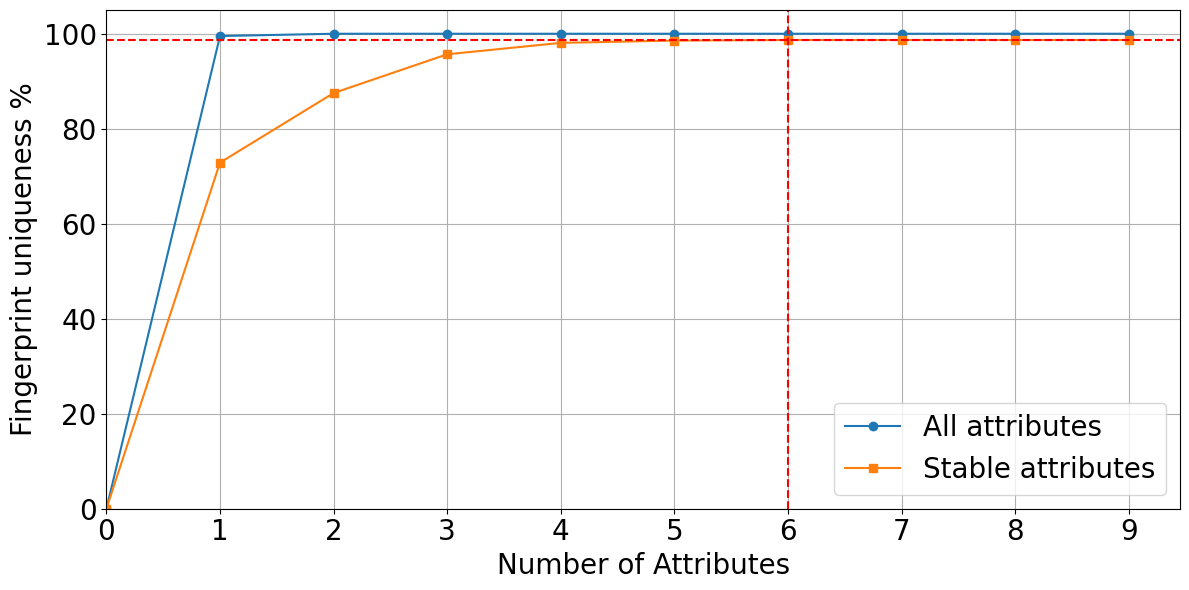

In [17]:
import matplotlib.pyplot as plt
# Data
unique_all = pd.read_csv('./all_fingerprint_uniqueness.csv')
unique_stable = pd.read_csv('./stable_fingerprint_uniqueness.csv')

unique_all = unique_all.head(10).reset_index(drop=True)
unique_stable = unique_stable.head(10).reset_index(drop=True)

print(unique_all.shape)
print(unique_stable.shape)
# Create DataFrame
df = pd.DataFrame({
    "Attribute": unique_all["Attribute"],
    "Unique All": unique_all["Unique %"],
    "Unique Stable": unique_stable["Unique %"]
})
df.head()


max_stable_value = df["Unique Stable"].max()
first_max_index = df[df["Unique Stable"] == max_stable_value].index[0]
first_max_attribute = df.loc[first_max_index, "Attribute"]
plt.rcParams["legend.fontsize"] = 20
# Plot
plt.figure(figsize=(12, 6))
# Prepend (0, 0) manually for plotting
plt.plot(df["Attribute"], df["Unique All"], label="All attributes", marker='o')
plt.plot(df["Attribute"], df["Unique Stable"], label="Stable attributes", marker='s')

# Add vertical and horizontal lines at max stable value
plt.axvline(x=first_max_attribute, color='red', linestyle='--')
plt.axhline(y=max_stable_value, color='red', linestyle='--')

plt.xlim(left=0)
plt.ylim(bottom=0)

# Axis settings
plt.xticks(ticks=range(0, 10, 1))
plt.yticks(ticks=range(0, 110, 20))
plt.xlabel("Number of Attributes", fontsize=20)
plt.ylabel("Fingerprint uniqueness %", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.legend()
plt.ylim(0, 105)

plt.tight_layout()

# Save as SVG
plt.savefig("fingerprint_uniqueness.svg", format="svg")

# Display the chart
plt.show()